In [2]:
import pygimli as pg
import numpy as np
import matplotlib.pyplot as plt
from pygimli.physics import ert
import pygimli.meshtools as mt


In [ ]:
world=mt.createWorld(start=[-1500,0],end=[2500,-1000],worldMarker=1)

body1_x=np.array([0,50,250,300,380,450,490,550,650,750,850,900,950,1000,1000,800,600,400,200,0,0])
body1_y=np.array([-20,-20,-20,-30,-40,-40,-30,-20,-20,-20,-30,-40,-40,-30,-60,-60,-60,-60,-60,-60,-20])
body1=np.column_stack((body1_x,body1_y)); 
geom1=mt.createPolygon(body1,marker=2,isClosed=True)

body2=mt.createRectangle(start=[0,-60],end=[1000,-80],marker=3); geom2=body2
body3=mt.createRectangle(start=[0,-80],end=[1000,-250],marker=4); geom3=body3
body4_x=np.array([400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,500,400])
body4_y=np.array([-250,-240,-235,-230,-224,-220,-213,-210,-207,-204,-200,-203,-210,-230,-235,-237,-240,-240,-240,-240,-250,-250,-250])
body4=np.column_stack((body4_x,body4_y)); 
geom4=mt.createPolygon(body4,marker=5,isClosed=True)
body5_x=np.array([0,100,200,300,400,500,600,700,800,900,1000,1000,
                  950,850,750,650,550,450,350,250,150,0])
body5_y=np.array([-80,-80,-80,-80,-80,-80,-80,-80,-80,-80,-80,-100,
                  -120,-150,-140,-180,-169,-200,-200,-190,-250,-250])
body5=np.column_stack((body5_x,body5_y)); 
geom5=mt.createPolygon(body5,marker=6,isClosed=True,interpolate='spline',addNodes=2)
geometry=world+geom1+geom2+geom3+geom4+geom5
pg.show(geometry,showMesh=True,quality=34)
mesh_cut = mt.createMesh(geometry, quality=34)
x_min,x_max= 0,1000
y_min,y_max= -250,0
ax,_=pg.show(mesh_cut,data=mesh_cut.cellMarkers(), showMesh=False, aspect='equal')    #cellMarkers gia ta xrwmata!
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

19/12/25 - 00:38:34 - Core - WARNING - Duplicated node found for: 0	-20	0
19/12/25 - 00:38:34 - Core - WARNING - Duplicated node found for: 400	-250	0


In [ ]:
spacing1=50
scheme1=ert.createData(
    elecs=np.linspace(start=0,stop=1000,num=len(np.arange(0,1001,spacing1)))
    , schemeName='slm'
)
print(scheme1)

12/12/25 - 22:08:39 - pyGIMLi - INFO - Cache /home/sider/miniconda3/envs/PyGimli/lib/python3.14/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 1): /home/sider/.cache/pygimli/12169865836135774933


Data: Sensors: 21 data: 90, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid']


In [ ]:
spacing2=50
scheme2=ert.createData(
    elecs=np.linspace(start=0,stop=1000,num=len(np.arange(0,1001,spacing2)))
    , schemeName='dd'
)
print(scheme2)

12/12/25 - 22:08:39 - pyGIMLi - INFO - Cache /home/sider/miniconda3/envs/PyGimli/lib/python3.14/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 1): /home/sider/.cache/pygimli/12465239586209032702


Data: Sensors: 21 data: 171, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid']


(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x7b50d1926660>)

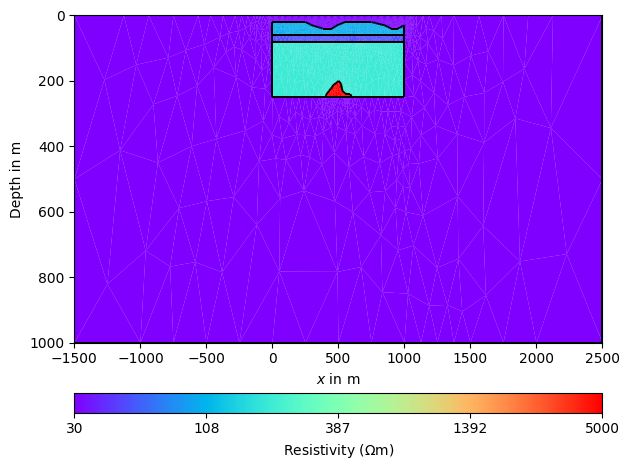

In [ ]:
for p in scheme1.sensors():
    geometry.createNode(p)
    geometry.createNode(p-[0,0.1]) # φτιάχνω 2 nodes για το FTDT
mesh_fwr=mt.createMesh(geometry,quality=34)
rhomap=[[1,30],
        [2,100],
        [3,50],
        [4,200],
        [5,1000]
        ] # resistivity για κάθε marker
pg.show(mesh_fwr,data=rhomap,label=pg.unit('res'), cMap='rainbow',logScale=True,aspect='auto')
# krataw idia geometria, opote thelw ena mesh, an allaksw to allazw
#for p in scheme2.sensors():
#     geometry.createNode(p)
#     geometry.createNode(p-[0,0.1]) # φτιάχνω 2 nodes για το FTDT
# mesh_fwr=mt.createMesh(geometry,quality=34)
# rhomap=[[1,30],
#         [2,100],
#         [3,50],
#         [4,200],
#         [5,5000]
#         ] # resistivity για κάθε marker
# pg.show(mesh_fwr,data=rhomap,label=pg.unit('res'), cMap='rainbow',logScale=True,aspect='auto')

In [ ]:
data1=ert.simulate(mesh_fwr,scheme=scheme1, res=rhomap, noiseLevel=5, noiseAbs=1e-6, seed=1337)

pg.info(np.linalg.norm(data1['err']),np.linalg.norm(data1['rhoa']))
pg.info('Simulated data: ',data1)
pg.info('The data contains : ',data1.dataMap().keys())
pg.info('Sim rhoa (min/max) : ' ,min(data1['rhoa']), max(data1['rhoa']))
pg.info('Selected data noise % (min/ma)x : ', min(data1['err'])*100, max(data1['err'])*100)

data2=ert.simulate(mesh_fwr,scheme=scheme2, res=rhomap, noiseLevel=5, noiseAbs=1e-6, seed=1337)

pg.info(np.linalg.norm(data2['err']),np.linalg.norm(data2['rhoa']))
pg.info('Simulated data: ',data2)
pg.info('The data contains : ',data2.dataMap().keys())
pg.info('Sim rhoa (min/max) : ' ,min(data2['rhoa']), max(data2['rhoa']))
pg.info('Selected data noise % (min/ma)x : ', min(data2['err'])*100, max(data2['err'])*100)


ModellingBase::setMesh() copying new mesh ... Found datafile: 21 electrodes
Found: 21 free-electrodes
rMin = 25, rMax = 2000
NGauLeg + NGauLag for inverse Fouriertransformation: 11 + 4
Found non-Neumann domain
0.167508 s
FOP updating mesh dependencies ... 4.83e-06 s
Calculating response for model: min = 

12/12/25 - 22:08:42 - pyGIMLi - INFO - Data error estimate (min:max)  0.05000561211452404 : 0.05023472236714156
12/12/25 - 22:08:42 - pyGIMLi - INFO - 0.47476811692733345 687.6070472243849
12/12/25 - 22:08:42 - pyGIMLi - INFO - Simulated data:  Data: Sensors: 21 data: 90, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
12/12/25 - 22:08:42 - pyGIMLi - INFO - The data contains :  ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
12/12/25 - 22:08:42 - pyGIMLi - INFO - Sim rhoa (min/max) :  41.2169700145731 101.31351900098943
12/12/25 - 22:08:42 - pyGIMLi - INFO - Selected data noise % (min/ma)x :  5.000561211452404 5.023472236714157


relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
30 max = 5000
Allocating memory for primary potential...... 0.0217824

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 0.62816s
Response: min = 40.0836 max = 97.6158 mean = 71.4764
Reciprocity rms(modelReciprocity) 0.0516751%, max: 0.0938021%
ModellingBase::setMesh() copying new mesh ... Found datafile: 21 electrodes
Found: 21 free-electrodes
rMin = 25, rMax = 2000
NGauLeg + NGauLag for inverse Fouriertransformation: 11 + 4
Found non-Neumann domain
0.0448932 s
FOP updating mesh dependencies ... 5.253e-06 s


12/12/25 - 22:08:42 - pyGIMLi - INFO - Data error estimate (min:max)  0.05001810728004565 : 0.05699038683387942
12/12/25 - 22:08:42 - pyGIMLi - INFO - 0.667693921737878 1432.8140498075122
12/12/25 - 22:08:42 - pyGIMLi - INFO - Simulated data:  Data: Sensors: 21 data: 171, nonzero entries: ['a', 'b', 'err', 'i', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
12/12/25 - 22:08:42 - pyGIMLi - INFO - The data contains :  ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
12/12/25 - 22:08:42 - pyGIMLi - INFO - Sim rhoa (min/max) :  32.11724827912888 200.3655182426984
12/12/25 - 22:08:42 - pyGIMLi - INFO - Selected data noise % (min/ma)x :  5.001810728004565 5.6990386833879425


relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Calculating response for model: min = 30 max = 5000
Allocating memory for primary potential...... 0.0011289

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 0.475092s
Response: min = 32.6013 max = 177.819 mean = 101.56
Reciprocity rms(modelReciprocity) 0.156299%, max: 0.427351%


12/12/25 - 22:08:42 - pyGIMLi - INFO - filtered rhoa minmax SLM :  41.2169700145731 101.31351900098943
12/12/25 - 22:08:43 - pyGIMLi - INFO - filtered rhoa minmax dd :  32.11724827912888 200.3655182426984


[[ 0  3  1  2]
 [ 1  4  2  3]
 [ 2  5  3  4]
 [ 3  6  4  5]
 [ 4  7  5  6]
 [ 5  8  6  7]
 [ 6  9  7  8]
 [ 7 10  8  9]
 [ 8 11  9 10]
 [ 9 12 10 11]
 [10 13 11 12]
 [11 14 12 13]
 [12 15 13 14]
 [13 16 14 15]
 [14 17 15 16]
 [15 18 16 17]
 [16 19 17 18]
 [17 20 18 19]
 [ 0  5  2  3]
 [ 1  6  3  4]
 [ 2  7  4  5]
 [ 3  8  5  6]
 [ 4  9  6  7]
 [ 5 10  7  8]
 [ 6 11  8  9]
 [ 7 12  9 10]
 [ 8 13 10 11]
 [ 9 14 11 12]
 [10 15 12 13]
 [11 16 13 14]
 [12 17 14 15]
 [13 18 15 16]
 [14 19 16 17]
 [15 20 17 18]
 [ 0  7  3  4]
 [ 1  8  4  5]
 [ 2  9  5  6]
 [ 3 10  6  7]
 [ 4 11  7  8]
 [ 5 12  8  9]
 [ 6 13  9 10]
 [ 7 14 10 11]
 [ 8 15 11 12]
 [ 9 16 12 13]
 [10 17 13 14]
 [11 18 14 15]
 [12 19 15 16]
 [13 20 16 17]
 [ 0  9  4  5]
 [ 1 10  5  6]
 [ 2 11  6  7]
 [ 3 12  7  8]
 [ 4 13  8  9]
 [ 5 14  9 10]
 [ 6 15 10 11]
 [ 7 16 11 12]
 [ 8 17 12 13]
 [ 9 18 13 14]
 [10 19 14 15]
 [11 20 15 16]
 [ 0 11  5  6]
 [ 1 12  6  7]
 [ 2 13  7  8]
 [ 3 14  8  9]
 [ 4 15  9 10]
 [ 5 16 10 11]
 [ 6 17 11

(<Axes: xlabel='a', ylabel='m'>,
 <matplotlib.colorbar.Colorbar at 0x7b50cb130ad0>)

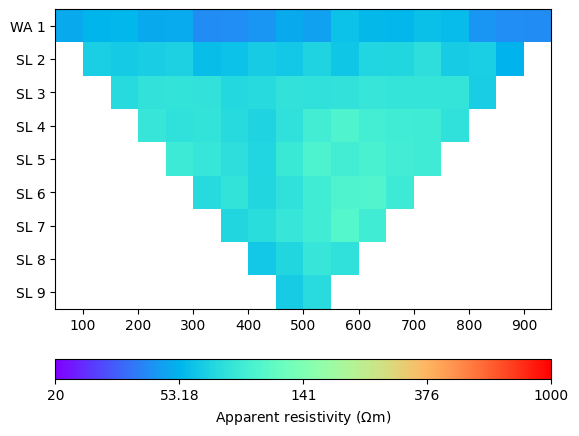

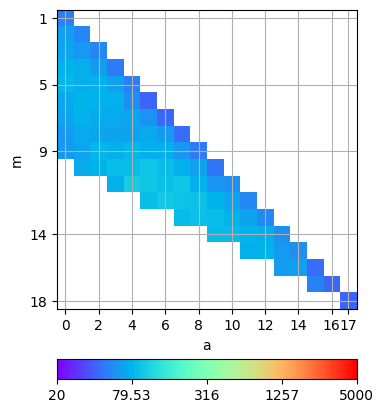

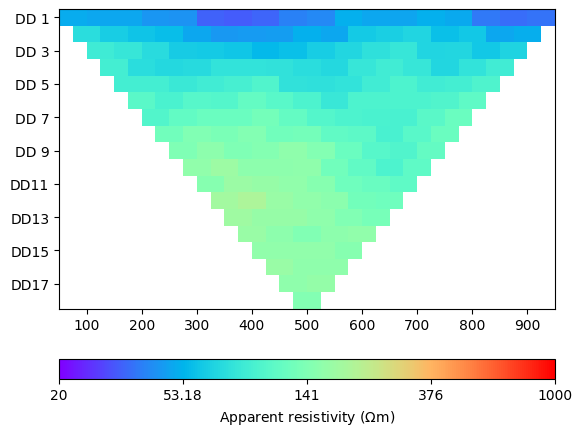

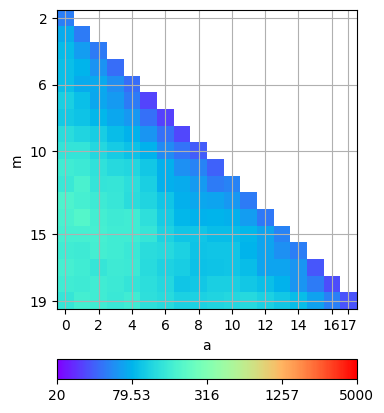

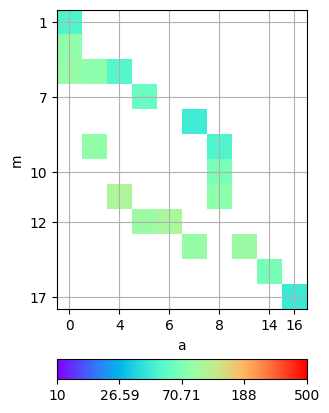

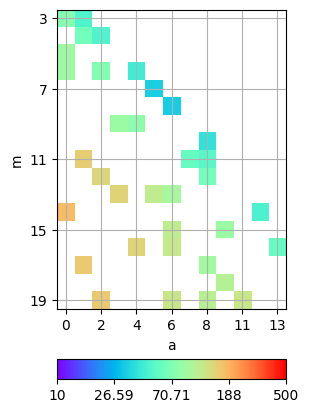

In [ ]:
data1.remove(data1['rhoa']<0)
pg.info('filtered rhoa minmax SLM : ', min(data1['rhoa']), max(data1['rhoa']))
#an thelw kanw save
data1.save('fwd_slm.dat')
ert.show(data1,cMap='rainbow',cMin=20,cMax=1000,logScale=True)   #pseudosection
pg.viewer.mpl.showDataContainerAsMatrix(data1,'a','m', 'rhoa',cMap='rainbow',cMin=20,cMax=5000,logScale=True,title='SLM')

data2.remove(data2['rhoa']<0)
pg.info('filtered rhoa minmax dd : ', min(data2['rhoa']), max(data2['rhoa']))
#an thelw kanw save
data2.save('fwd_dd.dat')
ert.show(data2,cMap='rainbow',cMin=20,cMax=1000,logScale=True,title='DD')   #pseudosection
pg.viewer.mpl.showDataContainerAsMatrix(data2,'a','m', 'rhoa',cMap='rainbow',cMin=20,cMax=5000,logScale=True,title='DD')


np.save("abmn_slm.npy", np.column_stack([data1['a'], data1['b'], data1['m'], data1['n']]))
np.save("res_all_slm.npy", np.column_stack([data1['rhoa']]))
abmn_data_slm = np.load("abmn_slm.npy")
print(abmn_data_slm)
print('------------------------------')
res_data_slm =np.load("res_all_slm.npy")
print(res_data_slm)

np.save("abmn_dd.npy", np.column_stack([data2['a'], data2['b'], data2['m'], data2['n']]))
np.save("res_all_dd.npy", np.column_stack([data2['rhoa']]))
abmn_data_dd = np.load("abmn_dd.npy")
print(abmn_data_dd)
print('------------------------------')
res_data_dd=np.load("res_all_dd.npy")
print(res_data_dd)





# twra ksekinaw na kovw metriseis apo to data gia na ftiaksw ta inversion data
no_mes1= np.array(data1['a']).shape[0]
ix1=np.random.choice(no_mes1, size=int(no_mes1*0.8), replace=False) # mark 8o% twn metrisewn

data1.markInvalid(ix1)
data1.removeInvalid() #ta afairw
pg.viewer.mpl.showDataContainerAsMatrix(data1,'a','m', 'rhoa',cMap='rainbow',cMin=10,cMax=500,logScale=True,title='SLM')




# twra ksekinaw na kovw metriseis apo to data gia na ftiaksw ta inversion data
no_mes2= np.array(data2['a']).shape[0]
ix2=np.random.choice(no_mes2, size=int(no_mes2*0.8), replace=False) # mark 8o% twn metrisewn

data2.markInvalid(ix2)
data2.removeInvalid() #ta afairw
pg.viewer.mpl.showDataContainerAsMatrix(data2,'a','m', 'rhoa',cMap='rainbow',cMin=10,cMax=500,logScale=True,title='DD')

In [ ]:
mgr1=ert.ERTManager('fwd_slm.dat')
mesh1=mgr1.createMesh(quality=34,paraMaxCellSize=40 ,paraDepth=250,paraDx=20)
inv1 = mgr1.invert(mesh=mesh1,verbose=True)
# Check that chi2 is below a reasonable threshold
assert mgr1.inv.chi2() < 6000, f"SLM chi2 too high: {mgr1.inv.chi2()}"

12/12/25 - 22:08:45 - pyGIMLi - INFO - Found 2 regions.
12/12/25 - 22:08:45 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)
12/12/25 - 22:08:45 - pyGIMLi - INFO - Found 2 regions.
12/12/25 - 22:08:45 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)
12/12/25 - 22:08:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/12/25 - 22:08:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/12/25 - 22:08:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 31986 Cells: 63508 Boundaries: 47862
12/12/25 - 22:08:48 - pyGIMLi - INFO - Use median(data values)=71.96405940582315
12/12/25 - 22:08:48 - pyGIMLi - INFO - Created startmodel from forward operator:13850, min/max=71.964059/71.964059
12/12/25 - 22:08:48 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 19.9065/19.9978
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7b50cb08b4c0>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 41.22/101
min/max (error): 5%/5.02%
min/max (start model): 71.96/71.96
--------------------------------------------------------------------------------
Calculating response for model: min = 71.9641 max = 71.9641
Allocating memory for primary potential...... 0.00813362

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 8.88778s
Response: min = 71.8356 max = 71.9756 mean = 71.9163
Reciprocity rms(modelReciprocity) 0%, max: 0%
min/max(dweight) = 19.9065/19.9978
Building constraints matrix
constraint matrix of size(nBounds x nModel) 20590 x 13850
check Jacobian: wrong dimensions: (0x0) should be (90x13850)  force: 1
jacobian size invalid, forced recalc: 1
Calculating Jacobian matrix (forced=1)..

In [ ]:
mgr2=ert.ERTManager('fwd_dd.dat')
mesh2=mgr2.createMesh(quality=34,paraMaxCellSize=40 ,paraDepth=250,paraDx=20)
inv2 = mgr2.invert(mesh=mesh2,verbose=True)
# Check that chi2 is below a reasonable threshold
assert mgr2.inv.chi2() < 6000, f"DD chi2 too high: {mgr2.inv.chi2()}"

12/12/25 - 22:09:22 - pyGIMLi - INFO - Found 2 regions.
12/12/25 - 22:09:22 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)
12/12/25 - 22:09:22 - pyGIMLi - INFO - Found 2 regions.
12/12/25 - 22:09:22 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)
12/12/25 - 22:09:22 - pyGIMLi - INFO - Creating forward mesh from region infos.
12/12/25 - 22:09:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
12/12/25 - 22:09:24 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 31986 Cells: 63508 Boundaries: 47862
12/12/25 - 22:09:28 - pyGIMLi - INFO - Use median(data values)=96.1179893634033
12/12/25 - 22:09:28 - pyGIMLi - INFO - Created startmodel from forward operator:13850, min/max=96.117989/96.117989
12/12/25 - 22:09:28 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 17.5468/19.9928
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7b50cb0d2f20>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 32.12/200
min/max (error): 5%/5.7%
min/max (start model): 96.12/96.12
--------------------------------------------------------------------------------
Calculating response for model: min = 96.118 max = 96.118
Allocating memory for primary potential...... 0.00734409

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 5.62177s
Response: min = 95.8324 max = 96.2431 mean = 96.0533
Reciprocity rms(modelReciprocity) 0%, max: 0%
min/max(dweight) = 17.5468/19.9928
Building constraints matrix
constraint matrix of size(nBounds x nModel) 20590 x 13850
check Jacobian: wrong dimensions: (0x0) should be (171x13850)  force: 1
jacobian size invalid, forced recalc: 1
Calculating Jacobian matrix (forced=1)...U

12/12/25 - 22:10:12 - pyGIMLi - INFO - Saving inversion results to: fwd_inv_slm.dat/ERTManager


(PosixPath('fwd_inv_slm.dat/ERTManager'),
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

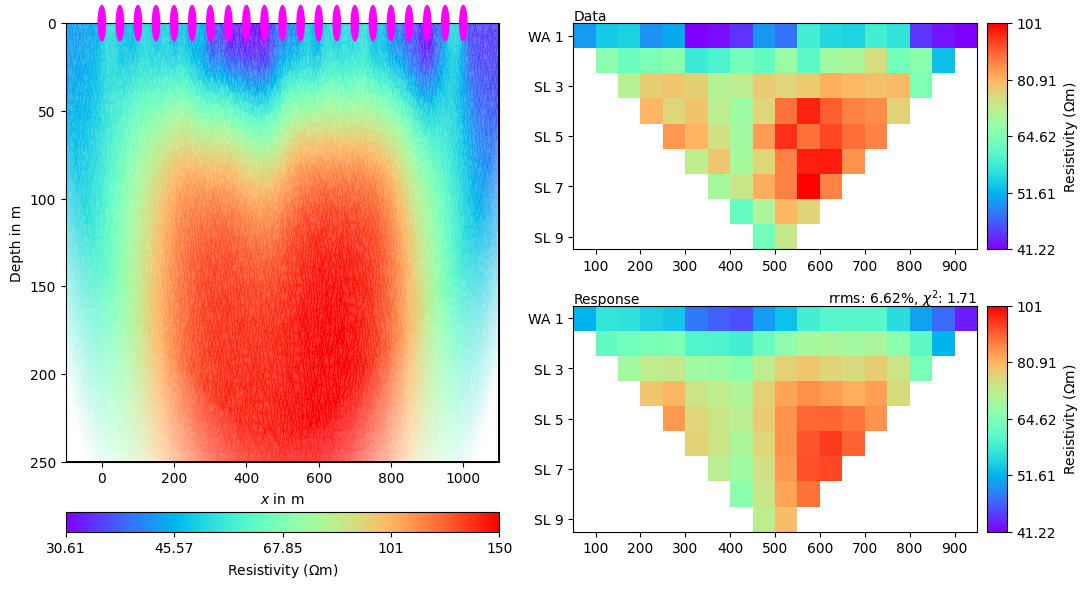

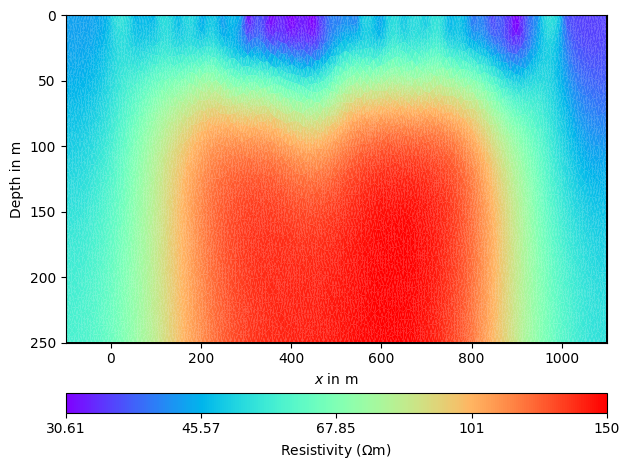

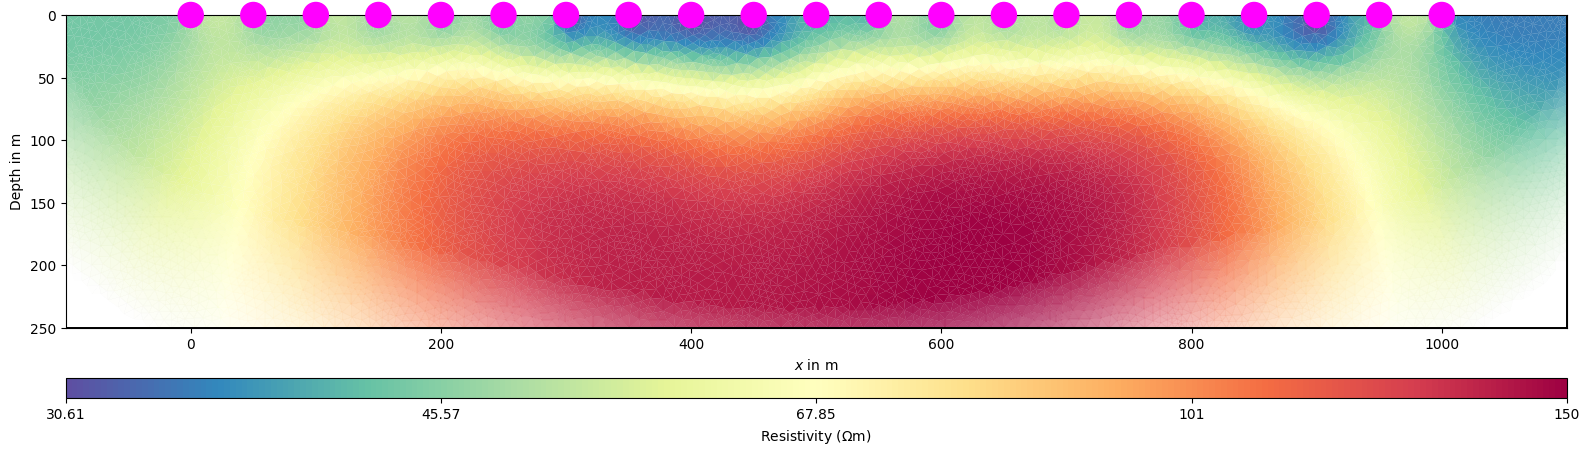

In [ ]:
mgr1.showResultAndFit(vmin=1, vmax=1000, cMap='rainbow', logScale=True,aspect='auto')
meshPD1 = pg.Mesh(mgr1.paraDomain) # Save copy of para mesh for plotting later
pg.show(mgr1.paraDomain, inv1, label=pg.unit('res'), cMap='rainbow', logScale=True, vmin=1, vmax=1000,aspect='auto')


mgr1.saveResult('fwd_inv_slm.dat')

12/12/25 - 22:10:18 - pyGIMLi - INFO - Saving inversion results to: fwd_inv_dd.dat/ERTManager


(PosixPath('fwd_inv_dd.dat/ERTManager'),
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

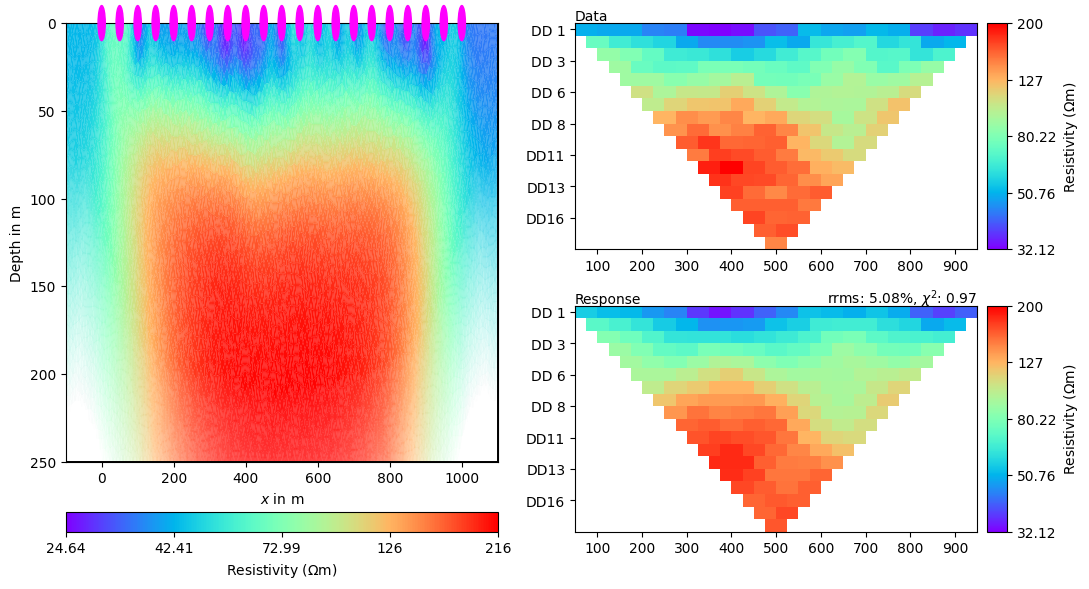

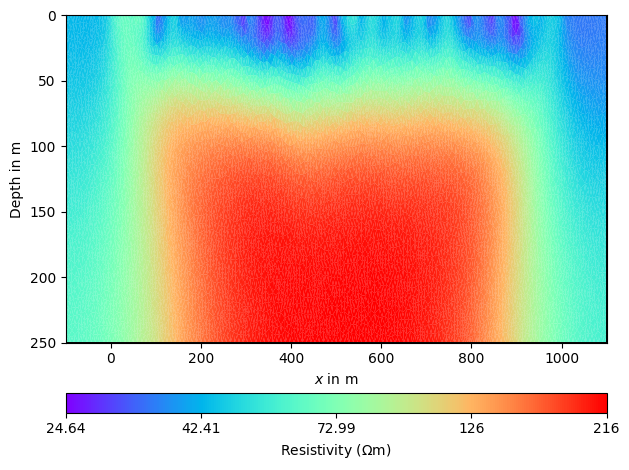

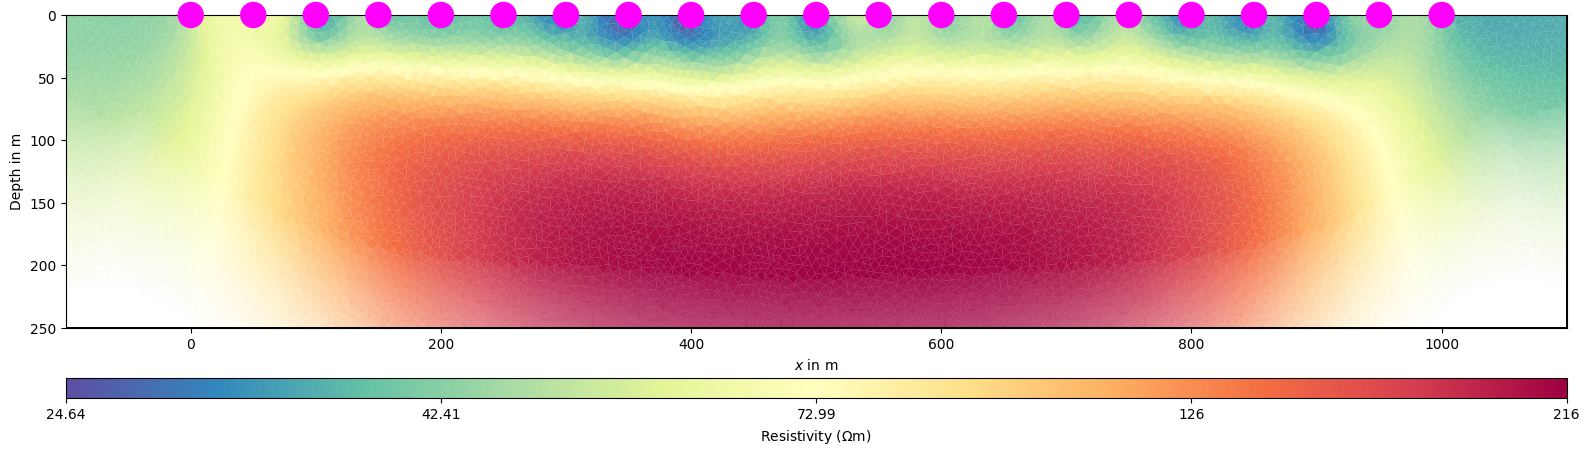

In [ ]:
mgr2.showResultAndFit(vmin=1, vmax=1000, cMap='rainbow', logScale=True,aspect='auto')
meshPD2 = pg.Mesh(mgr2.paraDomain) # Save copy of para mesh for plotting later
pg.show(mgr2.paraDomain, inv2, label=pg.unit('res'), cMap='rainbow', logScale=True, vmin=1, vmax=1000,aspect='auto')


mgr2.saveResult('fwd_inv_dd.dat')

6515


(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x7b50cb65dfd0>)

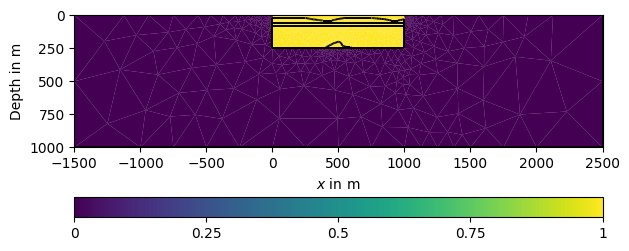

In [ ]:
slm_interp=pg.interpolate(mgr1.paraDomain,inv1,mesh_fwr.cellCenters())
dd_interp=pg.interpolate(mgr2.paraDomain,inv2,mesh_fwr.cellCenters())
#uparxoun 0, ta kanw eps gia to logscale=True
eps=1e-6
slm_interp=np.maximum(slm_interp,eps)
dd_interp=np.maximum(dd_interp,eps)

#ftiaxnw th maska poy prepei na sugkrinw
[x,y]=[mesh_fwr.cellCenters()[:,0],mesh_fwr.cellCenters()[:,1]]
mask = (
    (x>=0)
    & (x<=1000)
    & (y<=0)
    & (y>=-250)
)
print(np.sum(mask))
pg.show(mesh_fwr,data=mask.astype(int),cMap="viridis",showMesh=False)


In [ ]:
true_dict={1:30,2:100,3:50,4:200,5:5000}
true_values=np.array([true_dict[cell.marker()] for cell in mesh_fwr.cells()])
trues=true_values[mask]
slm_trues=slm_interp[mask]
dd_trues=dd_interp[mask]

rmse_slm=np.sqrt(np.mean((np.log(slm_trues)-np.log(trues))**2))
rmse_dd =np.sqrt(np.mean((np.log(dd_trues)-np.log(trues))**2))

print(f'RMSE SLM: {rmse_slm:.2f}')
print(f'RMSE DD : {rmse_dd:.2f}')

RMSE SLM: 0.54
RMSE DD : 0.49


In [ ]:
grid_x=np.linspace(0, 1001, 150)
grid_y=np.linspace(-250, 1, 100)
gx,gy =np.meshgrid(grid_x, grid_y)


#dialegw to montelo me to mikrotero rmse

slm_grid = np.array(pg.interpolate(mgr1.paraDomain, inv1, np.c_[gx.flatten(), gy.flatten()])
                    ).reshape(gx.shape)
slm_grid=np.log10(np.maximum(slm_grid,1e-6))
np.save("slm_inv_grid.npy",slm_grid)

# dd_grid = np.array(pg.interpolate(mgr2.paraDomain, inv2, np.c_[gx.flatten(), gy.flatten()])
#  ).reshape(gx.shape)
# #log
# dd_grid =np.log10(np.maximum(dd_grid , 1e-6))


np.save("slm_inv_grid.npy",slm_grid)
